In [1]:
import pandas as pd

DATA = '/kaggle/input/profile-of-body-metrics-and-fashion-colors/Profile of Body Metrics and Fashion Colors.csv'
df = pd.read_csv(filepath_or_buffer=DATA, sep=';')
df.head()

,Height(Centimeter),Weight(Kilograms),Gender,BMI,Skin Color,Clothes Color,Pants Color
0,167.089607,51.252494,Female,Underweight,"(127, 41, 44)","(10, 208, 132)","(112, 159, 153)"
1,181.648633,61.909547,Male,Ideal,"(204, 150, 103)","(234, 73, 19)","(62, 255, 200)"
2,176.272800,69.411778,Male,Ideal,"(235, 185, 152)","(152, 99, 83)","(186, 31, 117)"
3,173.270164,64.562199,Male,Ideal,"(243, 214, 200)","(215, 139, 137)","(194, 138, 63)"
4,172.181037,65.452010,Male,Ideal,"(252, 218, 191)","(27, 14, 179)","(248, 202, 148)"


Because BMI is a simple function of height and weight we should be able to see a sharp line distinguishing Ideal from Underweight BMI.

<Axes: xlabel='Weight(Kilograms)', ylabel='Height(Centimeter)'>

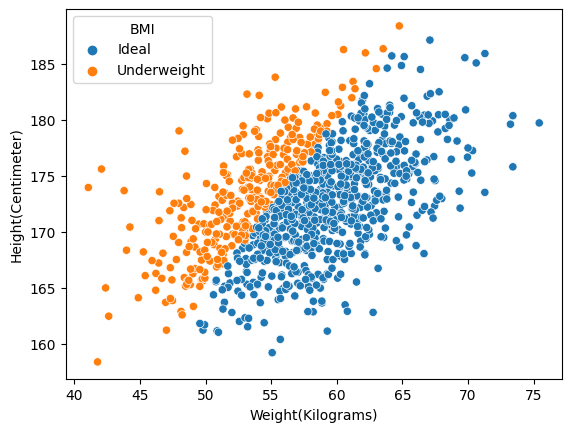

In [2]:
from seaborn import scatterplot

scatterplot(data=df.sample(n=1000, random_state=2024), x='Weight(Kilograms)', y='Height(Centimeter)', hue='BMI')

We also expect to see that men are taller and heavier than women but we should probably not see a sharp line.

<Axes: xlabel='Weight(Kilograms)', ylabel='Height(Centimeter)'>

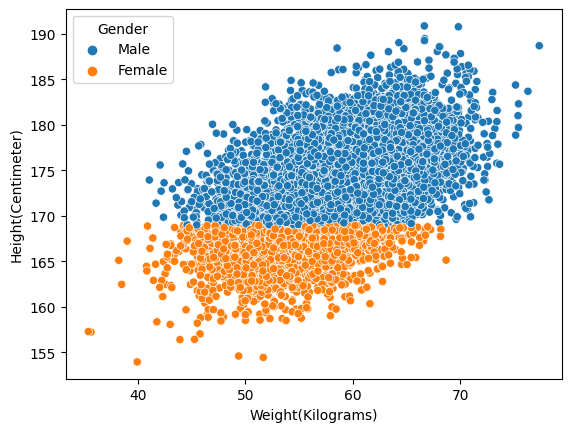

In [3]:
scatterplot(data=df.sample(n=10000, random_state=2024), x='Weight(Kilograms)', y='Height(Centimeter)', hue='Gender')

That's odd. Some of the women are heavier than some of the men, but all of the men are taller than all of the women. This suggests our data may be synthetic, or it may have been cleaned up somehow.

Let's make a grouped bar chart.

<Axes: xlabel='Gender'>

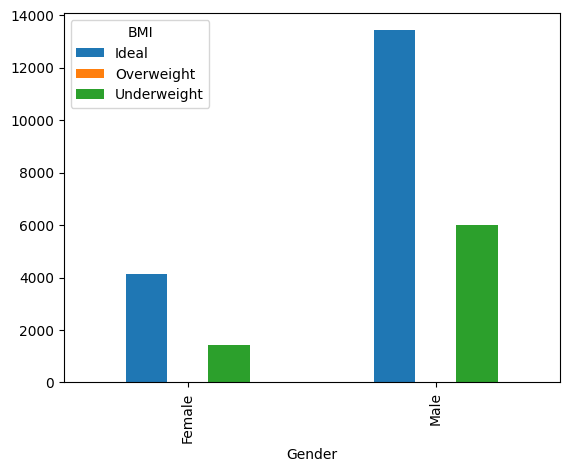

In [4]:
df[['BMI', 'Gender']].groupby(by=['Gender', 'BMI']).size().unstack(level=1).plot(kind='bar')

It is probably not shocking that the six overweight people in our dataset did not make our samples above since there are so few of them. And the data card did say something about the demographics of the group that should have warned us there would be almost no overweight people in BMI terms.

What do our height/weight correlations look like?

In [5]:
df[['Weight(Kilograms)', 'Height(Centimeter)']].corr()

,Weight(Kilograms),Height(Centimeter)
Weight(Kilograms),1.000000,0.502859
Height(Centimeter),0.502859,1.000000


What do we see if we break the data down by BMI or Gender? Do we expect the correlations to go up or down?

In [6]:
df[df['BMI'] == 'Ideal'][['Weight(Kilograms)', 'Height(Centimeter)']].corr()

,Weight(Kilograms),Height(Centimeter)
Weight(Kilograms),1.000000,0.660266
Height(Centimeter),0.660266,1.000000


In [7]:
df[df['BMI'] == 'Underweight'][['Weight(Kilograms)', 'Height(Centimeter)']].corr()

,Weight(Kilograms),Height(Centimeter)
Weight(Kilograms),1.000000,0.790572
Height(Centimeter),0.790572,1.000000


In [8]:
df[df['Gender'] == 'Male'][['Weight(Kilograms)', 'Height(Centimeter)']].corr()

,Weight(Kilograms),Height(Centimeter)
Weight(Kilograms),1.000000,0.408441
Height(Centimeter),0.408441,1.000000


In [9]:
df[df['Gender'] == 'Female'][['Weight(Kilograms)', 'Height(Centimeter)']].corr()

,Weight(Kilograms),Height(Centimeter)
Weight(Kilograms),1.000000,0.267662
Height(Centimeter),0.267662,1.000000


It probably makes sense that we would see higher height/weight correlations if we segment by BMI than by Gender.